In [104]:
#Solving a Machine Learning problem using python-Music Genre Analysis

# Music can sometimes capture our emotions,soul,mind and spirit 
#and there is a reason for that captivity. 
#The way we value music could be how we develop the liking on the artist or how popular is the artist, 
#the genre of the music, danceability of the music, the vibe the music brings ,
#how reminiscing the song is(the release date)and so on.

#Problem statement
#As a data scientist enthusiast I will be doing some music genre analysis .
#The features of music can evoke  feelings.
#We want to investigate how various features of music can make people feel, 
#and if over time the music changed. 
#Therefore I want to develop some machine learning algorithms to make some predictions on the features of music and
#to conduct some experiments  on which model is suitable and producing desired outcomes. 
#With the help of Python, I will accomplish this. 
#I will go step by step on how to achieve this. 
#I am working on Jupyter notebook. With the help of python and 
#other libraries used to accomplish machine learning tasks, visualizing(matplotlib),performing some performance metrics(sklearn) 
#and other intended tasks ,this will ease our way to accomplish our goal. 
#I will be working on a lyricDataset.csv to develop some machine learning models namely Linear Regression,Decision Tree and
#K Nearest Neighbors(KNN).I will go step by step on how to achieve this. I am working on Jupyter notebook.

In [105]:
# The first thing required before we create a datafrome  is to import the following libraries: pandas and numpy for 
#  peforming some mathematical calculations and reading files in varying formats like csv,excel,text files and many more.

import pandas as pd
import numpy as np

In [106]:
# Before we can even proceed further,it is very crucial to have an understanding of the dataset by providing a 
# description of each attribute in the dataset.Without a data understanding,we will end up being clueless and therefore provide
# inaccurate results as a data scientist or machine learning engineer.

#The full list of features are as follow:

#'Artist' - Song artist
#DESCRIPTION: Name of artist
#'Title' - Song title
#DESCRIPTION: Name of song
#'Album' - Album Title
#DESCRIPTION: Name of album the song is from.
#'#_of_views' - Number of pageviews for the lyric
#DESCRIPTION: Amount of views the lyric page got on the Genius website.
#'Release_date' - Release date of song
#DESCRIPTION: The date the song was released
#'#_feat_artists' - How many featured artists
#DESCRIPTION: The amount of artists featured on song
#'Artist_pop' - Artist Popularity
#DESCRIPTION: How popular an artist is on Spotify. Range is 0-100.
#'Genre' - Genre(s)
#DESCRIPTION: Genre the artist is considered as, separated by ' / '.
#'Followers'
#DESCRIPTION: The amount of users following an artist on Spotify
#'Danceability'
#DESCRIPTION: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. (Gotten from Spotify)
#'Track_pop'
#DESCRIPTION: Track popularity is separate from artist popularity. It's the metric grabbed from Spotify on how popular a track is.
#'Explicit'
#DESCRIPTION: If a song has lyrics on mature themes, or foul language, it is considered explicit. This is a binary value.
#'Energy'
#DESCRIPTION: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#'Valence'
#DESCRIPTION: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#'Duration' - Duration (in Milliseconds)
#DESCRIPTION: The length of the song in milliseconds
#'Loudness'
#DESCRIPTION: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
#'#_words' - Total words in lyrics
#DESCRIPTION: How many words each lyric has.
#'Lyrics'
#DESCRIPTION: The lyrics for the specific song.

In [107]:
#We then create column names and create the Dataframe for the data.
columns = ['Artist', 'Title', 'Album', '#_of_views', 'Release_date', '#_feat_artists', 
           'Artist_pop', 'Genre', 'Followers', 'Danceability', 'Track_pop', 'Explicit', 
           'Energy', 'Valence', 'Duration', 'Loudness', '#_words', 'Lyrics']
data = pd.read_csv('lyricDataset.csv', names = columns)

In [108]:
#After the we run the the code in Jupyter notebook, this is how the dataset displayed looks.
data.head()

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Track_pop,Explicit,Energy,Valence,Duration,Loudness,#_words,Lyrics
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,72,contemporary country / country / country dawn ...,2205152,0.568,57,False,0.562,0.247,240280,-7.775,233,Sting of the needle dropping on a vinyl\nNeon ...
1,Miranda Lambert,Tin Man,The Weight of These Wings,40702,2016-11-18,0,72,contemporary country / country / country dawn ...,2205152,0.425,63,False,0.372,0.292,259280,-10.920,147,Hey there Mr. Tin Man\nYou don't know how luck...
2,Miranda Lambert,Little Red Wagon,Platinum,29992,2014-06-03,0,72,contemporary country / country / country dawn ...,2205152,0.584,54,False,0.813,0.774,204387,-7.221,255,You only love me for my big sunglasses\nAnd my...
3,Miranda Lambert,Mama’s Broken Heart,Four the Record,29986,2013-01-14,0,72,contemporary country / country / country dawn ...,2205152,0.768,64,False,0.809,0.748,177773,-4.204,315,I cut my bangs with some rusty kitchen scissor...
4,Miranda Lambert,Somethin’ Bad,Platinum,26966,2014-05-19,1,72,contemporary country / country / country dawn ...,2205152,0.777,13,False,0.245,0.349,109107,-14.266,307,Stand on the bar stomp your feet start clapp...


In [109]:
#We must check for the dimensionality of our dataset using the data.shape function. 
#This provides us with the number of rows and columns in a dataset. There are 3011 rows/records and 18 columns/fields.
data.shape

(3011, 18)

In [110]:
#An inconsistent dataset will produce inconsistent and therefore inaccurate results. 
#To check for null/missing values in a dataset is one of the ways to check for irregularity and inconsistencies.
#I will check for null values for each and every column in a dataset using data.isnull().sum() function.
#As shown below we did found some null/missing values for the columns Album,Release_date,Genre,Explicit and Lyrics. 
#There must be a way to treat these null/missing values. We will treat these null /missing values
#at a later stage when doing some machine learning tasks.
data.isnull().sum()

Artist              0
Title               0
Album              42
#_of_views          0
Release_date      166
#_feat_artists      0
Artist_pop          0
Genre              20
Followers           0
Danceability        0
Track_pop           0
Explicit           16
Energy              0
Valence             0
Duration            0
Loudness            0
#_words             0
Lyrics              2
dtype: int64

In [122]:
#We see that a genre column is a little confusing. Most songs have more than one genre, 
#with some of the genres being sub-genres.
#For instance, instead of contemporary country, we can replace that with country.
#The same goes for pop-punk, metalcore, indie pop, etc.
#Instead, we will bin the genres so that there are no sub-genres allowed. 
#The only genres we want are country, hip hop, pop, rock and metal.So we need to tackle this.
genres = data['Genre']
g_list = list(genres)
genre_list = ['country', 'hip hop', 'pop', 'rock', 'punk', 'metal', 
              'australian']

In [124]:
correct_guesses = {}
for index, genre in enumerate(g_list):
    if type(genre) == float:
        continue
    else:
        if len(genre) == 1:
            print(genre)
            split_genres = genre
        else:
            split_genres = genre.split(' / ') 
    for g in genre_list:
        correct = 0
        if len(split_genres) == 1 and split_genres[0] == 'rap':
            correct_guesses['hip hop'] = correct
        else:
            for split in split_genres:
                if g in split:
                    correct += 1
            correct_guesses[g] = correct
    
    correct_genre = max(correct_guesses, key=lambda key: correct_guesses[key])
    if correct_genre == 'australian':
        g_list[index] = 'pop'
    elif correct_genre == 'punk':
        g_list[index] = 'rock'
    else:
        g_list[index] = correct_genre
    correct_guesses.clear()

In [125]:
#Genre problems-
#Some songs have strange genres, so we will convert those to pop. Some of the weird genres are 
#australian psychadelic and australian reggae. 
#The artists that have these genre tags are Sticky Fingers and Tame Impala. As far as I know, those artists are quite popular.
#Below the new Genre column is altered, so only one genre is listed.
data['Genre'] = g_list
data.head()

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Track_pop,Explicit,Energy,Valence,Duration,Loudness,#_words,Lyrics
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,72,country,2205152,0.568,57,False,0.562,0.247,240280,-7.775,233,Sting of the needle dropping on a vinyl\nNeon ...
1,Miranda Lambert,Tin Man,The Weight of These Wings,40702,2016-11-18,0,72,country,2205152,0.425,63,False,0.372,0.292,259280,-10.920,147,Hey there Mr. Tin Man\nYou don't know how luck...
2,Miranda Lambert,Little Red Wagon,Platinum,29992,2014-06-03,0,72,country,2205152,0.584,54,False,0.813,0.774,204387,-7.221,255,You only love me for my big sunglasses\nAnd my...
3,Miranda Lambert,Mama’s Broken Heart,Four the Record,29986,2013-01-14,0,72,country,2205152,0.768,64,False,0.809,0.748,177773,-4.204,315,I cut my bangs with some rusty kitchen scissor...
4,Miranda Lambert,Somethin’ Bad,Platinum,26966,2014-05-19,1,72,country,2205152,0.777,13,False,0.245,0.349,109107,-14.266,307,Stand on the bar stomp your feet start clapp...


In [126]:
#Various Genre Summaries
#Now that we've decreased the number of genres per song to just one genre, 
#we can begin some analysis. First we group the dataframe by the corrected genres.
#We can see pop has the most songs in this dataset, with country having the least.
data['Genre'].value_counts()

pop        880
hip hop    680
rock       620
metal      431
country    380
Name: Genre, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019357BDFD88>,
      dtype=object)

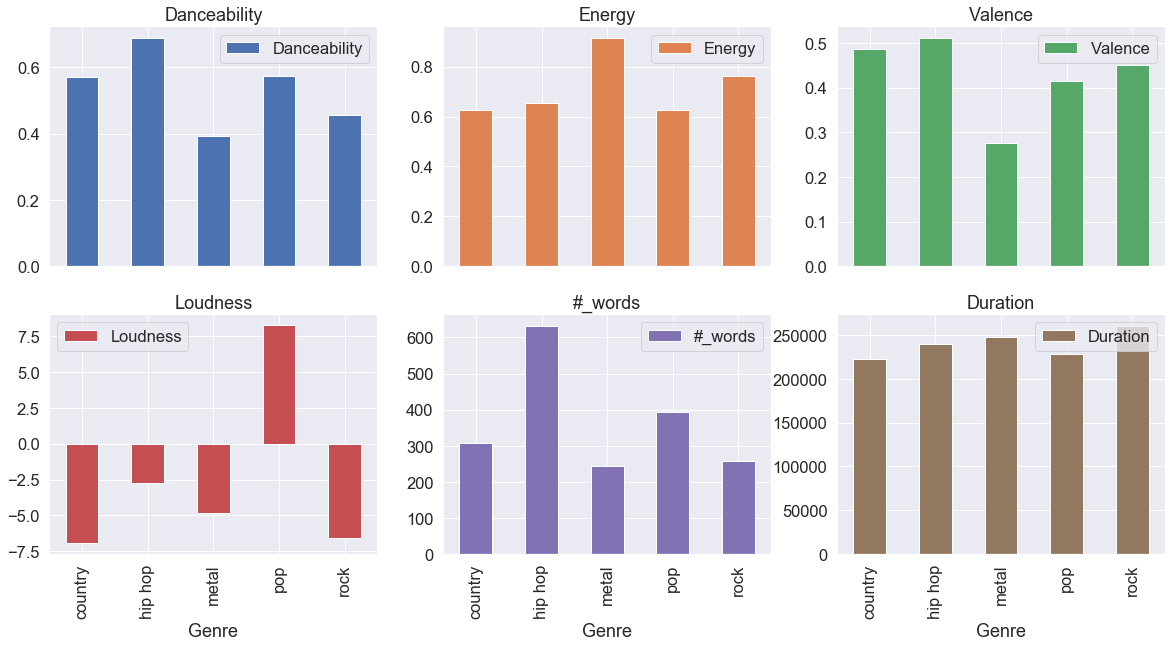

In [127]:
#Song Analytics
#Below we will get averages of some features all songs have. Those features are:
#How danceable a song is
#How much energy a song has
#The mood of a song
#How loud a song is
#How many words a song has
#How long songs are

import matplotlib.pyplot as plt
genre_analyze = data.groupby(['Genre'])
genre_analyze[['Danceability', 'Energy', 'Valence', 'Loudness', '#_words', 'Duration']].mean().plot.bar(subplots=True, layout=(3,3), figsize=(20,15))

In [128]:
#We will go feature-by-feature for these charts, noting interesting statistics about each feature.

#Danceability:

#As should be obvious, metal is the least danceable music amongst these genres. Unless you consider fighting dancing,
#but we're not analysing fightability.
#Hip-hop is the most danceable genre. I assume this is because of the bass and drums incorporated into many hip-hop songs.
#Interestingly, country is almost as danceable as pop music. I can only imagine cowboys two stepping to country music.

In [129]:
#Energy:

#Metal has the most energy amongst these genres. Metal music usually has fast riffs and fast instrumentals.
#Rock would be the next highest energy.
#The last three seem to have around the same energy.

In [130]:
#Valence:

#The most positive genre seems to be hip-hop. 
# Country would be the next.
#The metal genre is the least positive, from the entire bunch. That makes sense, since metal music can be dark sometimes.
#Country is almost as positive as hip-hop
#NOTE Something to note about this feature, is that we assume the instrumentals are used to calculate valence.

In [131]:
#Loudness:

#The closer to 0 the loudness, the more loud the music is.
#The most loud genre is pop. 
#Next loudest is is hip-hop.
#Rock is the generally the least loud.

In [132]:
#Number of words:

#Hip-hop has the highest average amount of words per song. Hip hop artists are usually lyricists.
#Even though hip hop artists have the highest word count, it could be repititions.
#The least wordy genre is metal. I assume this comes from metal being focused on instrumentals.


In [133]:
#Duration in milliseconds:

#The duration is close to the same for each genre.
#Rock seems to have the highest duration.

In [134]:
#I will be working on 3 Machine Learning algorithms as follows:
#Linear Regression.
#Decision Tree.
#K Nearest Neighbors.

# The first machine learning model that I'm working on is the Linear regression.
#Linear Regression:
#Lets define the term Linear Regression.
#Linear Regression is a statistical model used to predict the relationship between independent and 
#dependent variables denoted by x and y respectively.

 #Multiple linear regression is a statistical technique used to predict the outcome of a response variable 
#through several explanatory variables and model the relationships between them.
#So I will be using a Multiple Linear regression to Predict Track_pop.
#Recall:Track popularity is separate from artist popularity. It's the metric grabbed from Spotify on how popular a track is.


In [137]:
#We must first check to see if there are any null/missing values in a dataset before we get to to machine learning part.
 #We found some null values for the columns Album,Release_date,Genre,Explicit and Lyrics and these are object values.
 #We need to treat these missing values.
data.isnull().sum()

Artist              0
Title               0
Album              42
#_of_views          0
Release_date      166
#_feat_artists      0
Artist_pop          0
Genre              20
Followers           0
Danceability        0
Track_pop           0
Explicit           16
Energy              0
Valence             0
Duration            0
Loudness            0
#_words             0
Lyrics              2
dtype: int64

In [138]:
#For the columns Release_date and Album ,the missing values will be replaced with a hyphen symbol '-'.
data['Release_date'].fillna('-', inplace = True)
data['Album'].fillna('-', inplace = True)

In [139]:
#The column/field Genre is a very useful or significant in the dataset,so we need to treat this.
#All missing Genre from the same artist Gavlyn. And he is known as a hip hop artist. So we can fill the missing values.

data['Genre'].fillna('hip hop', inplace = True)

In [140]:
#For Explicit we drop the values with Na.

data.dropna(subset = ['Explicit'], inplace = True)
data.reset_index(drop = True, inplace = True)

In [141]:
#The missing lyrics from the only one song and this song is instrumental, so we just drop it.
data.dropna(subset = ['Lyrics'], inplace = True)
data.reset_index(drop = True, inplace = True)

In [142]:
#Now all the null/missing values have been treated.
data.isnull().sum()

Artist            0
Title             0
Album             0
#_of_views        0
Release_date      0
#_feat_artists    0
Artist_pop        0
Genre             0
Followers         0
Danceability      0
Track_pop         0
Explicit          0
Energy            0
Valence           0
Duration          0
Loudness          0
#_words           0
Lyrics            0
dtype: int64

In [143]:
#Now lets begin with the machine learning task.
# Python has offered some convenient libraries and 
#built in packages for accomplishing linear regression tasks with the help of scikit_learn.
# Before we perform any machine learning task,we must import libraries for machine learning,model validation
#and for metrics and reporting as follows:
from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [144]:
#Remember our goal is to predict Track_pop using Multiple Linear Regression.
#So our dependent/target variable is Track_pop and our independent variables are all numerical variables as follows:
#_of_views, #_feat_artists, Followers, Artist_pop, Danceability, Energy, Valence, Duration,Loudness and #_words.
#I will start by splitting the dataset into independent variables(x) and a dependent/target variable(y).
X = data[['#_of_views', '#_feat_artists', 'Followers', 'Artist_pop', 'Danceability', 'Energy', 'Valence', 'Duration','Loudness','#_words']]
y = data['Track_pop']

In [145]:
#We must import seaborn for visualizing scatterplots.
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

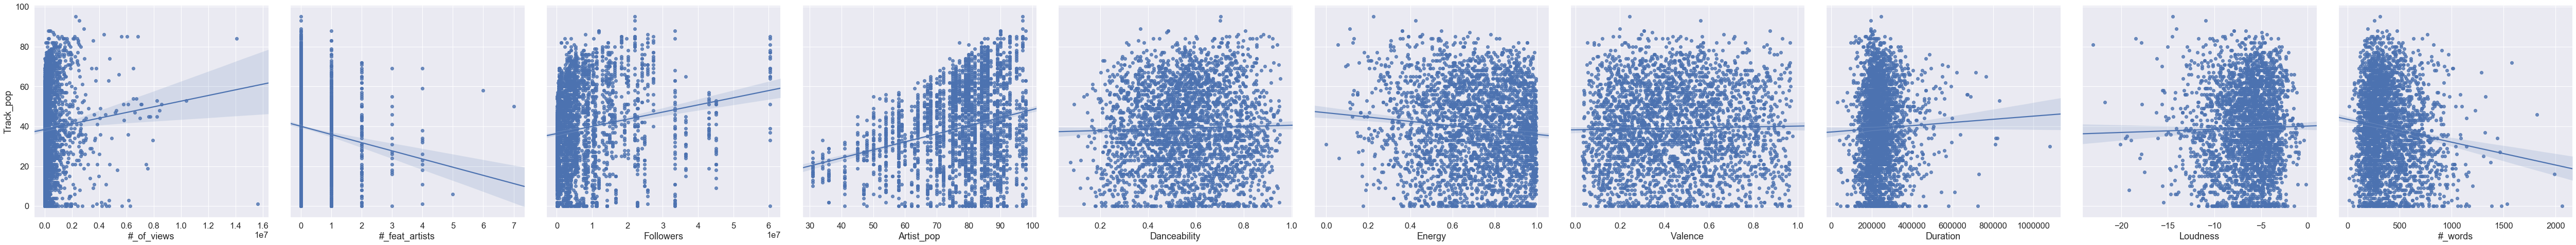

In [146]:
#We can use a scatterplot to visualize the relationship between the independent and dependent variables.
#As shown on the diagram below, all the independent variables except the Artist_pop variable 
#are not linearly correlated with the dependent variable, they not fit the linear regression line.

sns.pairplot(data, 
             x_vars=['#_of_views', '#_feat_artists', 'Followers', 'Artist_pop', 'Danceability', 'Energy', 'Valence', 'Duration','Loudness','#_words'], 
             y_vars='Track_pop', 
             height=7, 
             aspect=1, 
             kind='reg');

In [147]:
#We can also find the correlation between the variables. Correlations can vary from -1 to +1. 
#Closer to +1 means strong positive correlation and close to -1 means strong negative correlation. 
#Closer to 0 means not very strongly correlated. 
#Looking on the Track_pop variable we see that the independent variables are not strongly correlated with the Track_pop variable.
#The correlation percentages are close to 0 and some are close to -1 which indicates a weak and strong negative correlation.

data.corr()

,#_of_views,#_feat_artists,Artist_pop,Followers,Danceability,Track_pop,Energy,Valence,Duration,Loudness,#_words
#_of_views,1.000000,0.125771,0.403915,0.468249,0.238456,0.067754,-0.222613,-0.012494,0.014377,-0.076053,0.332044
#_feat_artists,0.125771,1.000000,0.054951,0.020853,0.191952,-0.111749,-0.057014,0.065748,0.014323,0.005297,0.366137
Artist_pop,0.403915,0.054951,1.000000,0.636062,0.245032,0.255981,-0.367142,0.047311,0.061714,-0.147365,0.235247
Followers,0.468249,0.020853,0.636062,1.000000,0.182270,0.163773,-0.255580,-0.007511,-0.001675,-0.065918,0.127049
Danceability,0.238456,0.191952,0.245032,0.182270,1.000000,0.027465,-0.266889,0.439665,-0.218033,-0.104281,0.469985
Track_pop,0.067754,-0.111749,0.255981,0.163773,0.027465,1.000000,-0.105536,0.020016,0.029614,0.021017,-0.118384
Energy,-0.222613,-0.057014,-0.367142,-0.255580,-0.266889,-0.105536,1.000000,0.158472,0.028573,0.727162,-0.060049
Valence,-0.012494,0.065748,0.047311,-0.007511,0.439665,0.020016,0.158472,1.000000,-0.201023,0.115295,0.217563
Duration,0.014377,0.014323,0.061714,-0.001675,-0.218033,0.029614,0.028573,-0.201023,1.000000,-0.033397,0.187831
Loudness,-0.076053,0.005297,-0.147365,-0.065918,-0.104281,0.021017,0.727162,0.115295,-0.033397,1.000000,0.004721


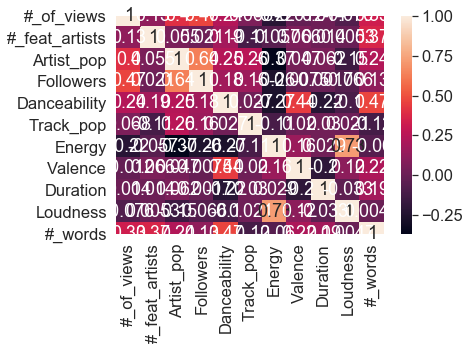

In [148]:
#A heat map can also used to show the correlations between variables.
sns.heatmap( data.corr(), annot=True );

In [149]:
#After we've splatted the dataset into dependent and independent variables, we must split X and y into training and testing sets.
#The testing size is 30% and the training size is 70%.
#Default split is 75% for training and 25% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [150]:
#The dimensions for X_train,y_train,X_test and y_test.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2095, 10)
(2095,)
(898, 10)
(898,)


In [151]:
#Next we instantiate the Linear Regression and then fit the model to the training data.

linreg = LinearRegression()

linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
#To make some prediction, we need to make predictions on the testing set.

y_pred = linreg.predict(X_test)


In [153]:
#The dimension for y_pred.
y_pred.shape

(898,)

In [154]:
# To evaluate the model performance ,a variety of metrics must be considered.I will provide an explanation of each of these 
# metrics.

#Mean Absolute Error (MAE) is the mean of the absolute value of the errors.


#we can calculate MAE by hand
# ,for example suppose we have the following values:10 ,0, 20, 10 and the defined true and predicted response values are:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# So to calculate MAE by hand ,we just add all the values and divide it by the number of values as follows:
print((10 + 0 + 20 + 10)/4)


10.0


In [155]:
# We can also calculate MAE using scikit-learn as follows:
print(metrics.mean_absolute_error(true, pred))

10.0


In [156]:
# Mean Squared Error(MSE) is the mean of the square of the errors. We can calculate the
#Mean Squared Error(MSE) by hand as follows:
print((10**2 + 0**2 + 20**2 + 10**2)/4.)
# We just need to square all the values and divide it by the number of values.

150.0


In [157]:
# We can also calculate MSE using scikit-learn as follows:
print(metrics.mean_squared_error(true, pred))

150.0


In [158]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# We can calculate Root Mean Squared Error (RMSE) by hand as follows:

import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))
# We start by importing numpy and then call the np.sqrt function.

12.24744871391589


In [159]:
# We can also calculate the Root Mean Squared Error (RMSE) using scikit-learn as follows:
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


In [160]:
# Lastly but not a least,the R-squared is a very significat metric to judge the accuracy of the model.
# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation


# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [161]:
# Model evaluation metrics for regression

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  16.232797998540445
Mean Sq  Error MSE      :  388.98972107775893
Root Mean Sq Error RMSE :  19.72282234057182
r2 value                :  0.15176566163537053


In [162]:
# Looking at the R-squared performance,we can say that the Linear Reression performance is poor with with an r-squared of
#15%.

#Now we've finished with the Linear regression algorithm,next comes the Decision Tree algorithm.

In [163]:
# Decision Tree Alogorithm
# What is a Decision Tree?
# A
#tree like structure in which the internal node represents
#the test on an attribute
#Each branch represents the outcome of the test, and each
#leaf node represents the class label
#A path from root to leaf represents classification rules


#Decision Trees (DT) can be used both for classification
#and regression.



In [164]:
# As usual before we do any machine learning model,we must first check for 
# null/missing values.
# There are none columns with null/missing values.
data.isnull().sum()

Artist            0
Title             0
Album             0
#_of_views        0
Release_date      0
#_feat_artists    0
Artist_pop        0
Genre             0
Followers         0
Danceability      0
Track_pop         0
Explicit          0
Energy            0
Valence           0
Duration          0
Loudness          0
#_words           0
Lyrics            0
dtype: int64

In [169]:
data.dtypes

Artist             object
Title              object
Album              object
#_of_views          int64
Release_date       object
#_feat_artists      int64
Artist_pop          int64
Genre              object
Followers           int64
Danceability      float64
Track_pop           int64
Explicit           object
Energy            float64
Valence           float64
Duration            int64
Loudness          float64
#_words             int64
Lyrics             object
dtype: object

In [170]:
# I will use the Decision Tree algorithm to Predict Genre.
# Then I will split the predictor variables into X1 and the responses in y1.
# For X1 I will drop all the categorical variables because I will be using Decision Tree Regression,and therefore Decision
# Tree Regression requires numerical variables for X1 and the target/dependent variable y1 will be the variable Genre.

X1 = data.drop(['Genre', 'Artist', 'Title', 'Album', 'Release_date', 'Explicit', 'Lyrics'], axis = 1)
y1 = data['Genre']

In [171]:
# As usual ,I will split the data into training and test data
# 30% for testing and 70% for training.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=24)

In [172]:
# The dimension for X_train set.
print(X_train1.shape)

(2095, 11)


In [173]:
#The criterion='entropy'
# What is Entropy?
# Entropy measures the impurity of a
#collection of examples.
#It depends on the distribution of the
#random variable.
#Entropy, in general, measures the
#amount of information in a random
#variable.


HOW_DEEP_TREES = 2

clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train1, y_train1)
# However we can choose the depth of the tree according to our own preference. The Decision Tree can be visualized by choosing 
# at at which depth the tree should stop.
# Here I chose the depth of the tree to be 2.

In [174]:
# We need to import the following libraries for visualizing a Decision tree.
from sklearn import tree
import graphviz 
from sklearn.tree import export_graphviz

In [175]:
# The Genre variable has some unique values: country,rock,metal,pop and hip hop.
y1.unique()

array(['country', 'rock', 'metal', 'pop', 'hip hop'], dtype=object)

In [176]:
# We can view a graph of a decision tree in pdf format.

dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=X1.columns,  
    class_names=y1,  filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_render',view=True)

'dtree_render.pdf'

In [177]:
# feature selection

# We do feature selection to select most useful and relevant features from the available dataset.
clf.feature_importances_

array([0.32425503, 0.        , 0.        , 0.09648136, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.57926362])

In [178]:
data.columns

Index(['Artist', 'Title', 'Album', '#_of_views', 'Release_date',
       '#_feat_artists', 'Artist_pop', 'Genre', 'Followers', 'Danceability',
       'Track_pop', 'Explicit', 'Energy', 'Valence', 'Duration', 'Loudness',
       '#_words', 'Lyrics'],
      dtype='object')

In [179]:
# We see the variable Track_pop as the useful feature for the Decision tree,which is close to 58% not bad.

for i in zip(data.columns, clf.feature_importances_):
    print(i)

('Artist', 0.3242550262214554)
('Title', 0.0)
('Album', 0.0)
('#_of_views', 0.09648135657027213)
('Release_date', 0.0)
('#_feat_artists', 0.0)
('Artist_pop', 0.0)
('Genre', 0.0)
('Followers', 0.0)
('Danceability', 0.0)
('Track_pop', 0.5792636172082726)


In [180]:
# We can predict the X_test1
y_pred1 = clf.predict(X_test1)

In [181]:
y_pred1

array(['pop', 'rock', 'rock', 'hip hop', 'hip hop', 'pop', 'hip hop',
       'pop', 'rock', 'pop', 'rock', 'pop', 'hip hop', 'pop', 'rock',
       'pop', 'rock', 'rock', 'rock', 'rock', 'pop', 'pop', 'hip hop',
       'pop', 'rock', 'hip hop', 'rock', 'rock', 'hip hop', 'rock', 'pop',
       'rock', 'hip hop', 'pop', 'rock', 'rock', 'rock', 'pop', 'pop',
       'hip hop', 'hip hop', 'hip hop', 'hip hop', 'pop', 'rock', 'pop',
       'pop', 'pop', 'hip hop', 'pop', 'rock', 'pop', 'rock', 'hip hop',
       'rock', 'pop', 'pop', 'rock', 'pop', 'rock', 'rock', 'pop', 'rock',
       'hip hop', 'rock', 'pop', 'pop', 'pop', 'pop', 'hip hop', 'rock',
       'rock', 'rock', 'pop', 'pop', 'pop', 'hip hop', 'pop', 'rock',
       'rock', 'hip hop', 'hip hop', 'pop', 'hip hop', 'rock', 'rock',
       'hip hop', 'pop', 'hip hop', 'rock', 'pop', 'pop', 'hip hop',
       'rock', 'pop', 'rock', 'hip hop', 'hip hop', 'hip hop', 'pop',
       'pop', 'rock', 'rock', 'hip hop', 'pop', 'rock', 'hip hop', 'p

In [182]:
# The accuracy score for the Decision tree to predict Genre is close to 51% which is not bad.
metrics.accuracy_score(y_test1, y_pred1)

0.5055679287305123

In [183]:
# We can print the confusion metrics and the classification report.
metrics.confusion_matrix(y_test1, y_pred1)

array([[  0,   7,   0,  18,  84],
       [  0, 153,   0,  40,  12],
       [  0,   4,   0,  27, 113],
       [  0,  47,   0, 183,  31],
       [  0,   9,   0,  52, 118]], dtype=int64)

In [184]:
from sklearn.metrics import classification_report
# classification report
print(classification_report(y_test1, y_pred1))



              precision    recall  f1-score   support

     country       0.00      0.00      0.00       109
     hip hop       0.70      0.75      0.72       205
       metal       0.00      0.00      0.00       144
         pop       0.57      0.70      0.63       261
        rock       0.33      0.66      0.44       179

    accuracy                           0.51       898
   macro avg       0.32      0.42      0.36       898
weighted avg       0.39      0.51      0.44       898



C:\Users\Nkululeko\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [185]:
# Now we've finished with the Decision Tree algorithm,lastly is the K Nearest Neighbors algorithm.

In [186]:
# K Nearest Neighbors(KNN)
# K nearest Neighbors algorithm is used to assign a data
#point to clusters based on similarity measurement.
# It uses supervised method for classification.
# The steps to write a KNN algorithm are as given below:
# Choose the number of k and a distance metric.
# •(k = 5 is common)
# Find k nearest neighbors of the sample that you want to classify
# Assign the class label by majority vote.
# A new input point is classified in the category such that it has the most number of neighbors from that category.
# For example:
#Classify a patient as high risk or low risk.

#Mark email as spam or ham.

# I will also use the K Nearest Neighbors(KNN) to predict Genre


In [205]:
# For the KNN algorithm I will split the predictor variables into X2 and the responses in y2.
# I will drop all the categorical variables for X2

X2 = data.drop(['Genre', 'Artist', 'Title', 'Album', 'Release_date', 'Explicit', 'Lyrics'], axis = 1)
y2 = data['Genre']

In [206]:
#As usual ,I will split the data into training and test data,with 30% for testing and 70% for training.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 24)

In [207]:
# I will then import the libraries for KNN ML algorithm and metrics calculations.

from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

import itertools

In [208]:
def confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def plot_cnf(model,dataset_x,dataset_y,the_y):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    #print("Real Test dataset labels: \n{}\n".format(true_y))
    #print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=genre_list,title='Confusion matrix')

Max Accuracy is 0.915 on test dataset with 1 neighbors.

Training Score: 1.000
Test score: 0.915
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------



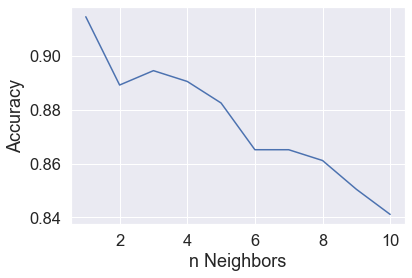

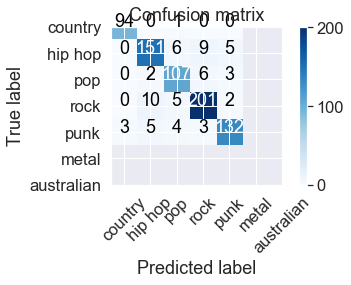

In [210]:
results_knn=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,y_train2)
    results_knn.append(knn.score(X_test2,y_test2))
    
max_accuracy_knn = max(results_knn)
best_k = 1 + results_knn.index(max(results_knn))

print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(np.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train2,y_train2)
print("Training Score: {:.3f}".format(knn.score(X_train2,y_train2)))
print("Test score: {:.3f}".format(knn.score(X_test2,y_test2)))  

plot_cnf(knn,X_test2,y_test2,y2)

In [215]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
score = []
for i in range(100):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    pipeline = make_pipeline(StandardScaler(), knn)
    pipeline.fit(X2, y2)
    scores = cross_val_score(pipeline, X = X2, y = y2, cv=5)
    score.append(scores.mean())

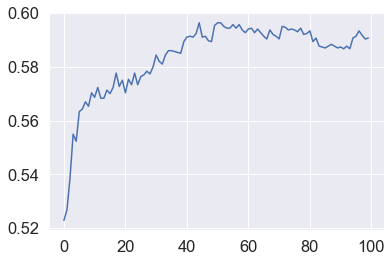

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(score)
#As show below on the graph,The best amount of neighbors is around 58.

In [218]:
# As we can see best accuracy for Genre is around 60% on KNN.
knn = KNeighborsClassifier(n_neighbors = 58)
pipeline = make_pipeline(StandardScaler(), knn)
pipeline.fit(X2, y2)
scores = cross_val_score(pipeline, X = X2, y = y2, cv=5)
scores

array([0.64      , 0.58166667, 0.52842809, 0.63210702, 0.59631491])

In [219]:
# Model comparison
# Which machine learning model gives best accuracy?
# For the Linear Regression model we found that the r-squared was 15%,and it was said that model resulted in a poor performance.
# For the Decision Tree we've predicted the accuracy score for the model,and we've came with an accuracy score close to 51%.
# This was not bad.
# Lastly for the KNN model,it was stated that the best accuracy for Genre was around 60%.

# In comparison of all these machine learning models,the champion model is KNN model.

In [220]:
# Conclusion
# There can be many useful scenarios that can be used to solve machine learning models.For an example we can predict a weather
# by applying a linear regression model,for classification problems we can apply a Decision tree to predict whether a student
# has failed or passed and so on.

# Hope you enjoyed!

# You can find my full code on my Github link as follows: